In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_cleaned.pkl'))

df = df.dropna()
print(len(df))
df.head()

124717


,pretensao_futura,reprovacao,possui_tv,desempenho_aluno,possui_computador,raca_cor,turno,proficiencia,evasao_escolar_ate_final_ano,id_aluno,...,gosta_estudar_disciplina,disciplina,desempenho_aluno_cat,leitura,frequenta_entretenimento,responsaveis_incentivam,escolaridade_pais,leitura_pais,estuda_regularmente,tempo_extra
26050,2.0,0.0,2.0,Básico,1,2,2,0.261208,0,23065545,...,1.0,MT,1,0.571429,0.25,1.0,2.5,0.5,1.333333,2.0
26051,2.0,0.0,3.0,Básico,1,0,2,-0.637643,0,23065559,...,0.0,LP,1,0.800000,0.50,1.0,2.5,1.0,1.000000,1.5
26058,2.0,0.0,3.0,Insuficiente,1,0,2,-1.805837,0,23065559,...,0.0,MT,0,0.800000,0.50,1.0,2.5,1.0,0.000000,1.5
26059,2.0,0.0,2.0,Proficiente,1,2,2,0.875437,0,23065545,...,0.0,LP,2,0.571429,0.25,1.0,2.5,0.5,1.666667,2.0
26064,0.0,0.0,4.0,Básico,1,1,2,-0.695548,0,23056981,...,1.0,LP,1,1.857143,1.00,1.0,1.5,1.0,1.666667,2.5


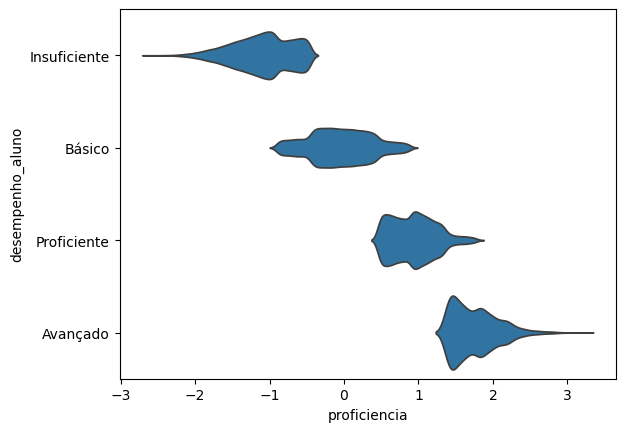

In [3]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente', 'Avançado']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=df, inner=None, order=ordem)
plt.show()

In [4]:
df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,124717.000000,124717.000000
mean,-0.207149,0.865944
std,0.820777,0.714000
min,-2.613658,0.000000
25%,-0.801632,0.000000
50%,-0.224817,1.000000
75%,0.359774,1.000000
max,3.214629,3.000000


In [5]:
# remover outliers
from sklearn.covariance import EllipticEnvelope

X = df[['proficiencia', 'desempenho_aluno_cat']]

ee = EllipticEnvelope(contamination=0.01)

ee.fit(X)

outliers = ee.predict(X) == -1

_df = df[~outliers]
_df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,123469.000000,123469.000000
mean,-0.211112,0.858321
std,0.794946,0.697527
min,-2.023070,0.000000
25%,-0.796022,0.000000
50%,-0.225830,1.000000
75%,0.351684,1.000000
max,1.923605,3.000000


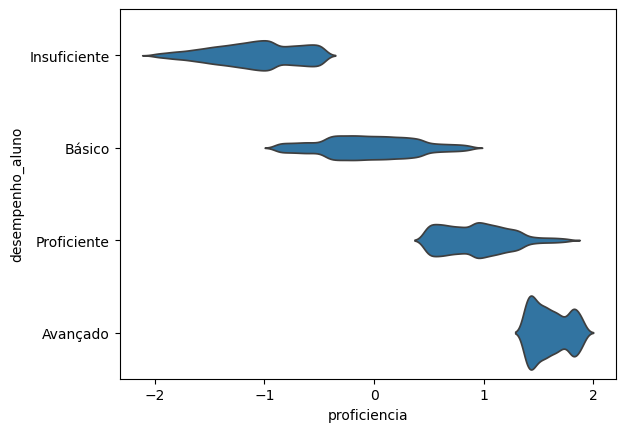

In [6]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente', 'Avançado']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=_df, inner=None, order=ordem)
plt.show()

In [7]:
# Droppando Avançado
_df = _df[_df['desempenho_aluno'] != 'Avançado']
_df[['proficiencia', 'desempenho_aluno_cat']].describe()

,proficiencia,desempenho_aluno_cat
count,121681.000000,121681.000000
mean,-0.237731,0.826851
std,0.769345,0.652153
min,-2.023070,0.000000
25%,-0.805348,0.000000
50%,-0.241499,1.000000
75%,0.322826,1.000000
max,1.789611,2.000000


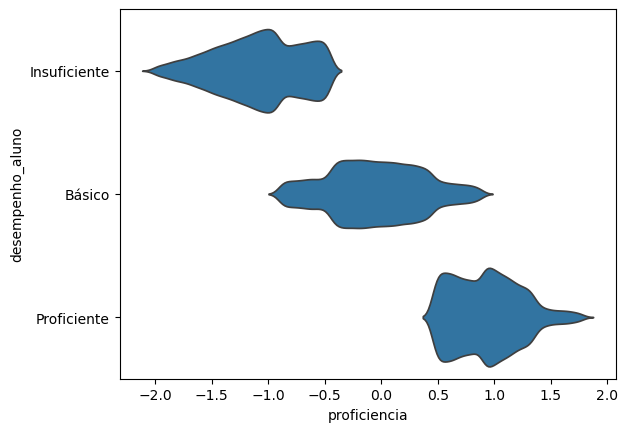

In [8]:
# analisando proficiencia e desempenho (descobrir em que categorias estão cada nível de proficiencia)
ordem = ['Insuficiente', 'Básico', 'Proficiente']

sns.violinplot(x='proficiencia', y='desempenho_aluno', data=_df, inner=None, order=ordem)
plt.show()

<AxesSubplot: xlabel='proficiencia', ylabel='Count'>

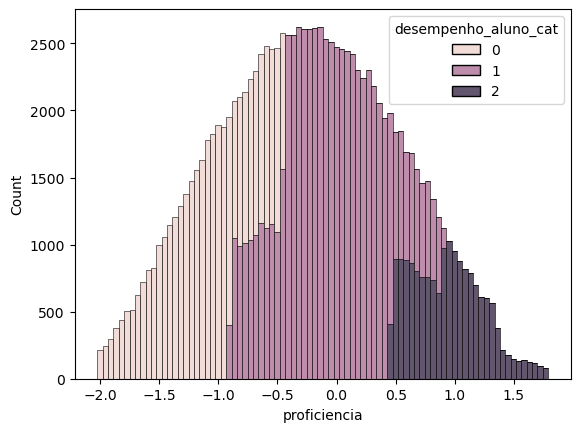

In [9]:
# histograma das proficiencias e desempenho

sns.histplot(data=_df, x='proficiencia', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='proficiencia', ylabel='Count'>

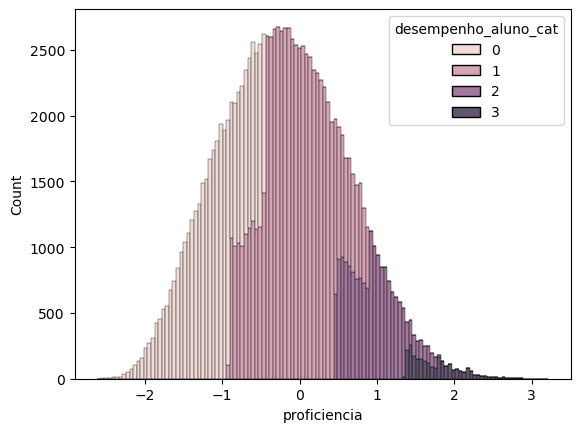

In [11]:
# desempenhos originais para comparação

sns.histplot(data=df, x='proficiencia', hue='desempenho_aluno_cat', multiple='stack')

Comparando erro padrão das classes

<AxesSubplot: xlabel='erro_padrao', ylabel='Count'>

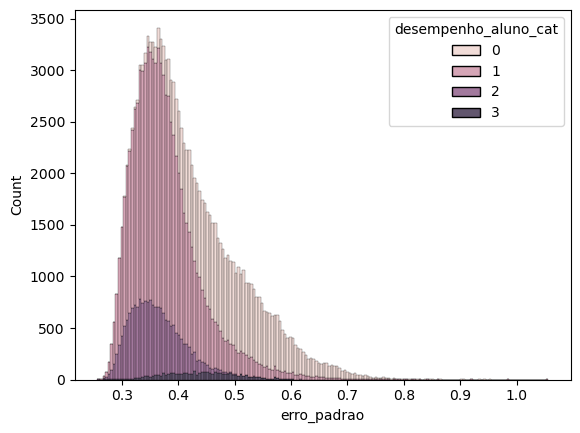

In [12]:
sns.histplot(data=df, x='erro_padrao', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='erro_padrao', ylabel='Count'>

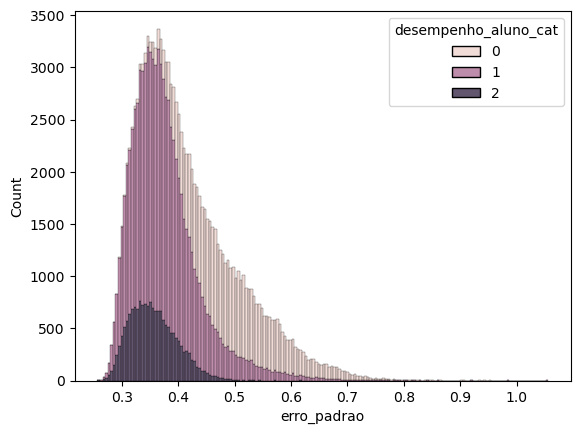

In [13]:
sns.histplot(data=_df, x='erro_padrao', hue='desempenho_aluno_cat', multiple='stack')

<AxesSubplot: xlabel='proficiencia', ylabel='erro_padrao'>

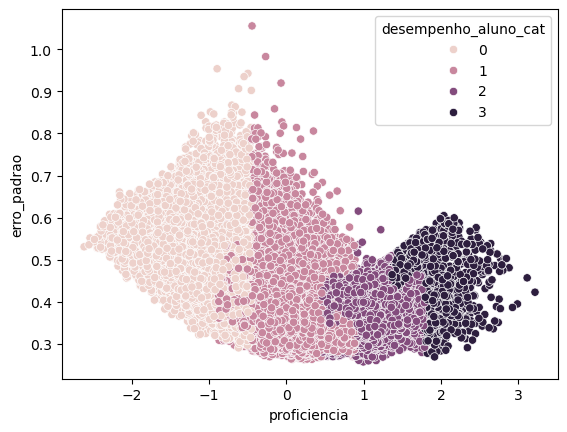

In [14]:
sns.scatterplot(data=df, x='proficiencia', y='erro_padrao', hue='desempenho_aluno_cat')

<AxesSubplot: xlabel='proficiencia', ylabel='erro_padrao'>

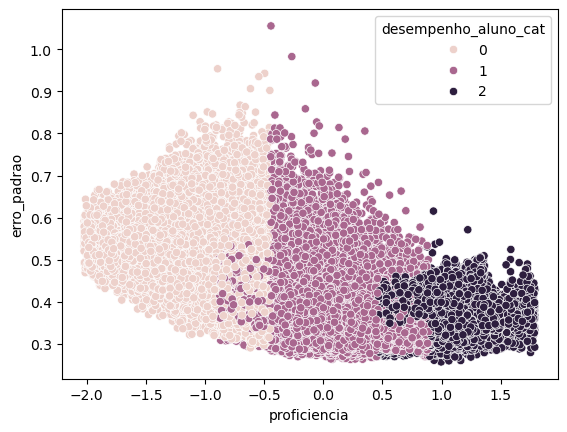

In [17]:
sns.scatterplot(data=_df, x='proficiencia', y='erro_padrao', hue='desempenho_aluno_cat')

Aplicando PCA para ver a relação entre as variáveis

In [32]:
# valores únicos das colunas
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno', 'desempenho_aluno_cat',]

extra = ['possui_computador', 'possui_tv', 'gosta_estudar_disciplina', 'possui_trabalho', 'inicio_estudos', 'responsaveis_comparecem_reuniao_pais', 'reprovacao', 'pretensao_futura',
         'evasao_escolar_ate_final_ano']

for col in _df.columns:
    if col not in exclude and col not in extra:
        print(col, _df[col].unique())

idade [13 14 15 16 17 18]
leitura [0.57142857 0.8        1.85714286 0.33333333 1.28571429 1.14285714
 0.28571429 1.57142857 0.42857143 0.85714286 0.71428571 1.
 0.66666667 0.14285714 1.25       1.42857143 1.71428571 0.
 1.5        0.16666667 2.         0.5        0.83333333 1.16666667
 1.33333333 1.66666667 1.2        0.4        1.6        1.83333333
 1.4        0.6        0.75       0.2        1.8        0.25
 1.75      ]
frequenta_entretenimento [0.25       0.5        1.         0.         0.75       1.25
 1.75       0.66666667 0.33333333 2.         1.5        1.33333333
 1.66666667]
responsaveis_incentivam [1.         0.8        0.6        0.2        0.5        0.4
 0.         0.75       0.66666667 0.25       0.33333333]
escolaridade_pais [2.5 1.5 4.  3.  5.  3.5 2.  4.5 1.  0.  0.5]
leitura_pais [0.5  1.   0.75 0.25 0.  ]
estuda_regularmente [1.33333333 1.         0.         1.66666667 0.66666667 2.
 0.5        1.5        0.33333333]
tempo_extra [2.  1.5 2.5 1.  3.5 0.5 3.  4.  0. 

In [61]:
# aplicando PCA para redução de dimensionalidade

from umap import umap
from sklearn.preprocessing import StandardScaler

X = _df[[col for col in _df.columns if col not in exclude and col not in extra]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

_df.loc[:, 'pca1'] = X[:, 0]
_df.loc[:, 'pca2'] = X[:, 1]

sns.scatterplot(data=_df, x='pca1', y='pca2', hue='desempenho_aluno_cat')

ImportError: cannot import name 'umap' from 'umap' (/home/erlo/.local/lib/python3.12/site-packages/umap/__init__.py)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

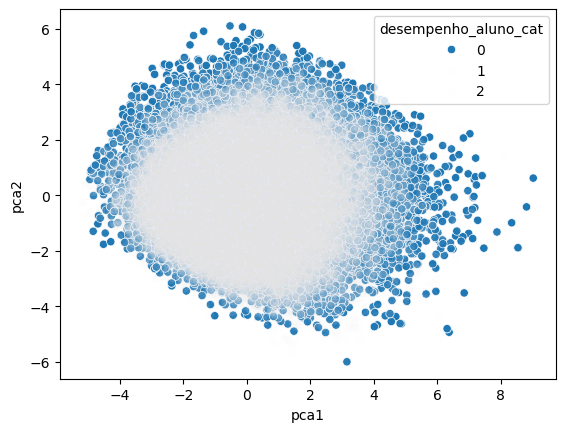

In [34]:
# applying hue only for class 0 
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', hue='desempenho_aluno_cat')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', palette='light:b', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', palette='light:b', hue='desempenho_aluno_cat', alpha=0.05)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

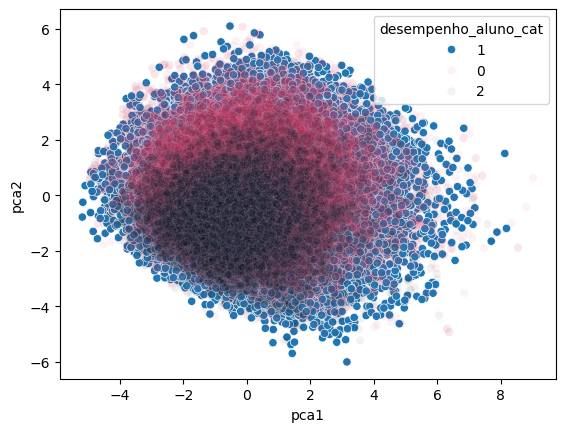

In [35]:
# applying hue only for class 1
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', hue='desempenho_aluno_cat')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)

<AxesSubplot: xlabel='pca1', ylabel='pca2'>

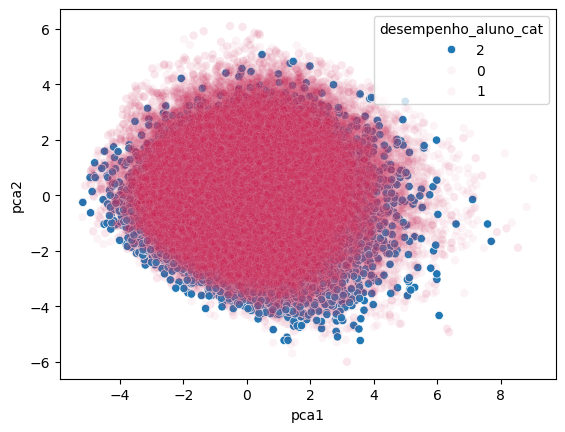

In [36]:
# applying hue only for class 2
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 2], x='pca1', y='pca2', hue='desempenho_aluno_cat', palette='tab10')
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 0], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)
sns.scatterplot(data=_df[_df['desempenho_aluno_cat'] == 1], x='pca1', y='pca2', palette='rocket', hue='desempenho_aluno_cat', alpha=0.05)

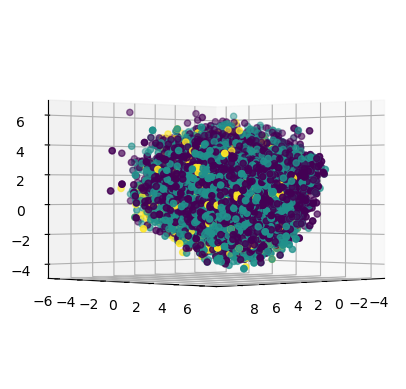

In [39]:
# PCA com 3 componentes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X = _df[[col for col in _df.columns if col not in exclude and col not in extra]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pca.fit_transform(X)

_df.loc[:, 'pca1'] = X[:, 0]
_df.loc[:, 'pca2'] = X[:, 1]
_df.loc[:, 'pca3'] = X[:, 2]

# plottando em 3 dimensões
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Corrigindo a chamada para ax.scatter
ax.scatter(_df['pca1'], _df['pca2'], _df['pca3'], c=_df['desempenho_aluno_cat'])

ax.view_init(elev=0, azim=45)

plt.show()

In [40]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = _df[[col for col in _df.columns if col not in exclude and col not in extra]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

_df['pca1'] = X_pca[:, 0]
_df['pca2'] = X_pca[:, 1]
_df['pca3'] = X_pca[:, 2]

# Criando o gráfico interativo com Plotly
fig = px.scatter_3d(
    _df, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='desempenho_aluno_cat',
    title='PCA 3D Scatter Plot'
)

# Salvar o gráfico como um arquivo HTML
fig.write_html('pca_3d_scatter_plot.html')

# Para visualizar o gráfico no navegador
import webbrowser
webbrowser.open('pca_3d_scatter_plot.html')

True

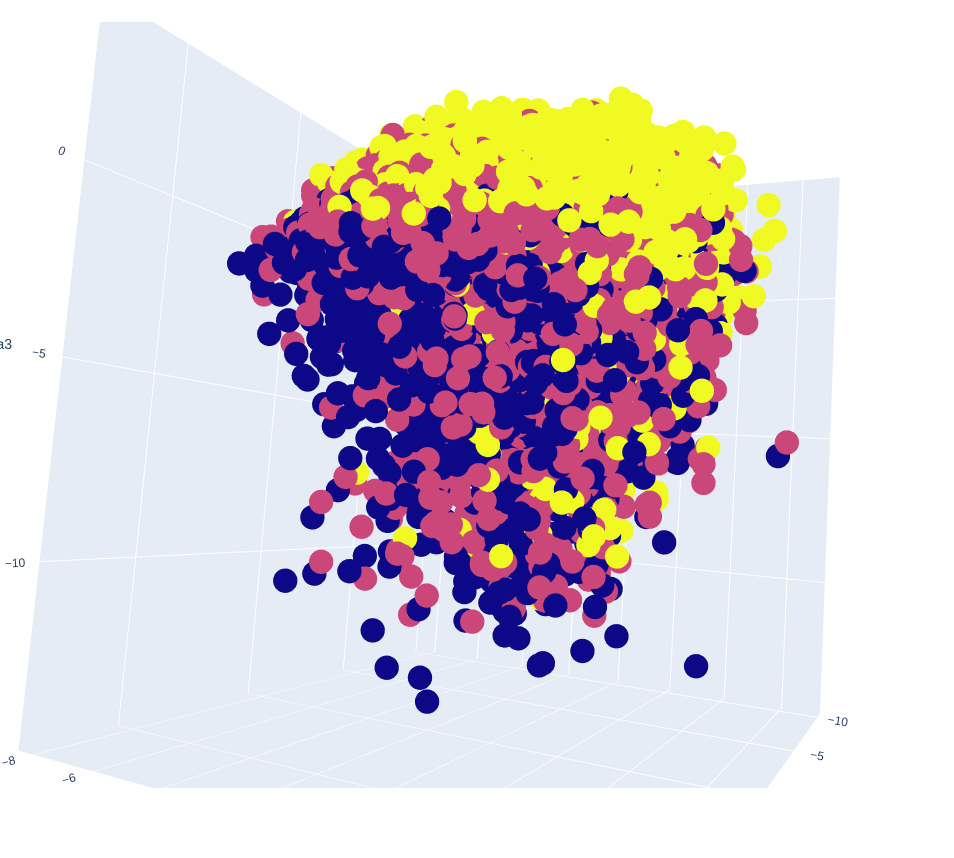

In [71]:
save = False

_new_df = _new_df.drop(columns=['pca1', 'pca2', 'cluster'])
new_df = new_df.drop(columns=['pca1', 'pca2', 'cluster'])
if save:
    _new_df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_3-NO.pkl'))
    new_df.to_pickle(os.path.join(DATA_FOLDER, 'saeb_treated_NO.pkl'))